In [1]:
import pandas as pd
from Models.GlassBox.figs.figs_class import FIGS_class
%reload_ext autoreload
%autoreload 2

In [2]:
FIGS_parameter = dict(
    max_rules= [5,10,15,20,25],
    max_trees=[2,3,4,5,6,7,8,9,10],
    min_impurity_decrease=[0.1, 0.2, 0.3],
)
gridsearch_parameters = dict(
    path="./../../../outputs/scores/",
    name="0",
    nDCG_at=15
)

# Grid-search

In [3]:
gs = FIGS_class(**gridsearch_parameters)

In [4]:
best_ = gs.grid_search(FIGS_parameter)
gs.save_model(best_[0], name="FIGSReg")

Finding the best model: 100%|██████████| 135/135 [00:51<00:00,  2.62it/s, nDCG=0.986]


# Metric evalutation

In [5]:
best_model = gs.load_model(name="./saved_models/FIGSReg")

In [6]:
# nDCG on test-set
nDCG_train = gs.eval_model(model=best_model, df=gs.train, nDCG_at=[1,10,15])
nDCG_valid = gs.eval_model(model=best_model, df=gs.valid, nDCG_at=[1,10,15])
nDCG_test = gs.eval_model(model=best_model, df=gs.test, nDCG_at=[1,10,15])

display(pd.DataFrame([nDCG_train,nDCG_valid,nDCG_test],index=["Training","Validation","Test"]))

,nDCG@1,nDCG@10,nDCG@15
Training,0.9351,0.9665,0.9719
Validation,0.9466,0.9786,0.9855
Test,0.9373,0.9687,0.9762


In [23]:
best_model

FIGSRegressor(max_rules=25, max_trees=8, min_impurity_decrease=0.1)

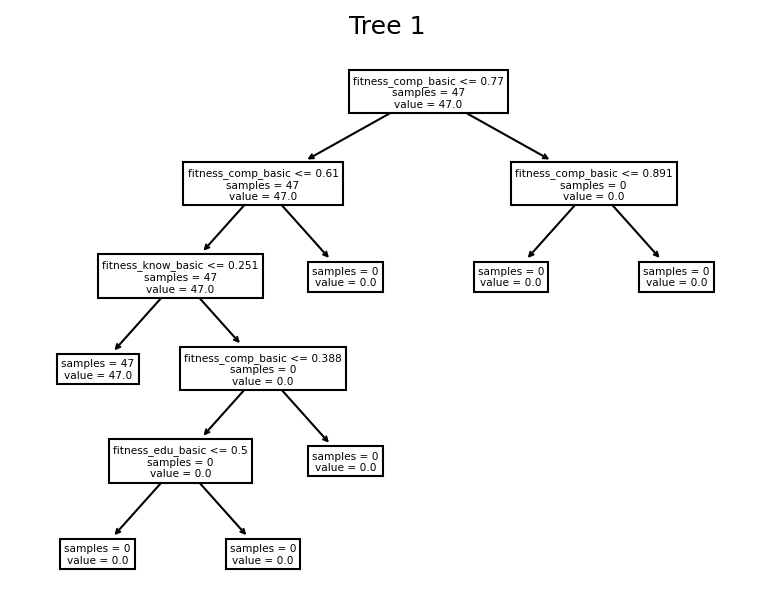

In [24]:
best_model.plot(tree_number=1)